<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Statistics for Machine Learning <br>MPA-1
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### About the dataset (Adult Income Data)

The dataset contains information about the individuals' age, gender, and several attributes affecting the income of a person. <br> Attribute information:

**age:** Age of an individual

**workclass:** Working class of the individual

**fnlwgt:** Weights based on the demographic characteristics

**education:** Highest education of the individual

**education.num:** Education encoded with unique numbers

**marital.status:** Marital status of the individual

**occupation:** Occupation of the individual

**relationship:** Relation of the individual in the family

**race:** Race of the individual

**sex:** Gender of the individual (0 = Male, 1 = Female)

**capital.gain:** Gain amount of the individual

**capital.loss:** Loss amount of the individual

**hours.per.week:** Working hours per week

**native.country:** The native country of the individual

**income:** Income of the individual

##  Table of Content

1. **[Understand the Dataset](#data)**
2. **[Measures of Central Tendency](#ct)**
3. **[Measures of Dispersion](#md)**
4. **[Skewness and kurtosis](#sk)**
5. **[Correlation](#corr)**
6. **[Probability and Distributions](#prob)**

**Import the required libraries**

In [24]:

# import pandas
import pandas as pd

# import numpy
import numpy as np

# import matplotlib.pyplot
import matplotlib.pyplot as plt

# import seaborn
import seaborn as sns

# to suppress the warnings
import warnings
warnings.filterwarnings('ignore')

#For probability questions
import math
from math import comb

In [2]:
#!pip install openpyxl

**Load the adults income dataset and print first five observations**

In [60]:
data=pd.read_excel("adult_income.xlsx")
df=pd.DataFrame(data)

df.head()
df=df.replace('?','NAN')

In [67]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NAN,77053,HS-grad,9,Widowed,NAN,Not-in-family,White,1,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,1,0,4356,18,United-States,<=50K
2,66,NAN,186061,Some-college,10,Widowed,NAN,Unmarried,Black,1,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,1,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,1,0,3900,40,United-States,<=50K


<a id="data"> </a>
## 1. Understand the Dataset

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Find out the numerical and categorical variables in the data. If any variable is wrongly identified, do the needful
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [62]:
data_types = df.dtypes
numerical_variables =  df.select_dtypes(exclude=['object', 'category']).columns.tolist()

categorical_variables = df.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_summary = df[numerical_variables].describe()

In [63]:
categorical_summary = df[categorical_variables].describe()
print(categorical_summary)

       workclass education      marital.status      occupation relationship  \
count      32561     32561               32561           32561        32561   
unique         9        16                   7              15            6   
top      Private   HS-grad  Married-civ-spouse  Prof-specialty      Husband   
freq       22696     10501               14976            4140        13193   

         race native.country income  
count   32561          32561  32561  
unique      5             42      2  
top     White  United-States  <=50K  
freq    27816          29170  24720  


In [64]:
# Print the results
print("Numerical Variables:")
print(numerical_variables)
print("\nCategorical Variables:")
print(categorical_variables)


Numerical Variables:
['age', 'fnlwgt', 'education.num', 'sex', 'capital.gain', 'capital.loss', 'hours.per.week']

Categorical Variables:
['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'native.country', 'income']


In [68]:
df['sex']=pd.cut(df['sex'], bins=[0,0.5,1.5], labels=['Male','Female'])

In [69]:
data_types = df.dtypes
numerical_variables =  df.select_dtypes(exclude=['object', 'category']).columns.tolist()

categorical_variables = df.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_summary = df[numerical_variables].describe()
categorical_summary = df[categorical_variables].describe()
# Print the results
print("Numerical Variables:")
print(numerical_variables)
print("\nCategorical Variables:")
print(categorical_variables)

Numerical Variables:
['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']

Categorical Variables:
['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country', 'income']


In [70]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NAN,77053,HS-grad,9,Widowed,NAN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NAN,186061,Some-college,10,Widowed,NAN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


<a id="ct"> </a>
## 2. Measures of Central Tendency

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. What is the average age of males and females in the data?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [7]:
avg_age_males=df[df['sex'] == 0]['age'].mean().round()
avg_age_females=df[df['sex']==1]['age'].mean().round()

#df.groupby('sex')['age'].mean().round()
print('Average age of males :',avg_age_males)
print('Average age of females : ',avg_age_females)

Average age of males : 39.0
Average age of females :  37.0


In [27]:
df.groupby('sex')['age'].mean().round()

sex
0    39.0
1    37.0
Name: age, dtype: float64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Identify the qualification of most of the individuals </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [75]:
education_qualification=df['education'].mode().values[0]
print('Qualification of most of individuals is :',education_qualification)

Qualification of most of individuals is : HS-grad


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4
                  . Find the middle most observation of age for different working class</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [9]:
df.groupby('workclass')['age'].median()

workclass
Federal-gov         43.0
Local-gov           41.0
NAN                 35.0
Never-worked        18.0
Private             35.0
Self-emp-inc        45.0
Self-emp-not-inc    44.0
State-gov           39.0
Without-pay         57.0
Name: age, dtype: float64

<a id="md"> </a>
## 3. Measures of Dispersion

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Which occupation has more variability in the working hours</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [10]:
df.groupby('occupation')['hours.per.week'].var()

occupation
Adm-clerical          91.964888
Armed-Forces         198.000000
Craft-repair          81.939394
Exec-managerial      123.412395
Farming-fishing      299.987814
Handlers-cleaners    111.946104
Machine-op-inspct     57.648955
NAN                  225.317543
Other-service        161.442544
Priv-house-serv      261.939597
Prof-specialty       157.159186
Protective-serv      152.072728
Sales                175.202547
Tech-support         112.001859
Transport-moving     161.833503
Name: hours.per.week, dtype: float64

In [11]:
df.groupby('occupation')['hours.per.week'].std()

occupation
Adm-clerical          9.589833
Armed-Forces         14.071247
Craft-repair          9.052038
Exec-managerial      11.109113
Farming-fishing      17.320156
Handlers-cleaners    10.580459
Machine-op-inspct     7.592691
NAN                  15.010581
Other-service        12.706004
Priv-house-serv      16.184548
Prof-specialty       12.536315
Protective-serv      12.331777
Sales                13.236410
Tech-support         10.583093
Transport-moving     12.721380
Name: hours.per.week, dtype: float64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b> 6. What is the range of the middle 50% of working hours per week?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [12]:
Q1=df['hours.per.week'].quantile(0.25)
Q3=df['hours.per.week'].quantile(0.75)

IQR = Q3 - Q1

# Calculate the range of the middle 50% of working hours
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

print(f"The IQR (Interquartile Range) is: {IQR}")
print(f"The range of the middle 50% of working hours is from {lower_limit} to {upper_limit}")

The IQR (Interquartile Range) is: 5.0
The range of the middle 50% of working hours is from 32.5 to 52.5


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Are there any variables which can be excluded from further analysis based on their variability?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [13]:
print('Yes we can exclude the Lower variablity which is near to zero which is meaning less and Higher variablity leads to deviation of result ')

Yes we can exclude the Lower variablity which is near to zero which is meaning less and Higher variablity leads to deviation of result 


<a id="sk"> </a>
## 4. Skewness and kurtosis

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Is there any negatively skewed feature. Support your answer with a metric and the plot</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [14]:
print('This is optional output :')
age_skewness= df['age'].skew()
fnlwgt_skewness= df['fnlwgt'].skew()
education_num_skewness= df['education.num'].skew()
capital_gain_skewness= df['capital.gain'].skew()
capital_loss_skewness= df['capital.loss'].skew()
hours_per_week_skewness= df['hours.per.week'].skew()
print('Skewness of Age are',age_skewness)
print('Skewness of fnlwgt are',fnlwgt_skewness)
print('Skewness of education_num are',education_num_skewness)
print('Skewness of capital_gain are',capital_gain_skewness)
print('Skewness of capital_loss are',capital_loss_skewness)
print('Skewness of hours_per_week are',hours_per_week_skewness)


This is optional output :
Skewness of Age are 0.5587433694130483
Skewness of fnlwgt are 1.4469800945789828
Skewness of education_num are -0.31167586791022966
Skewness of capital_gain are 11.953847687699794
Skewness of capital_loss are 4.594629121679696
Skewness of hours_per_week are 0.22224067717684567


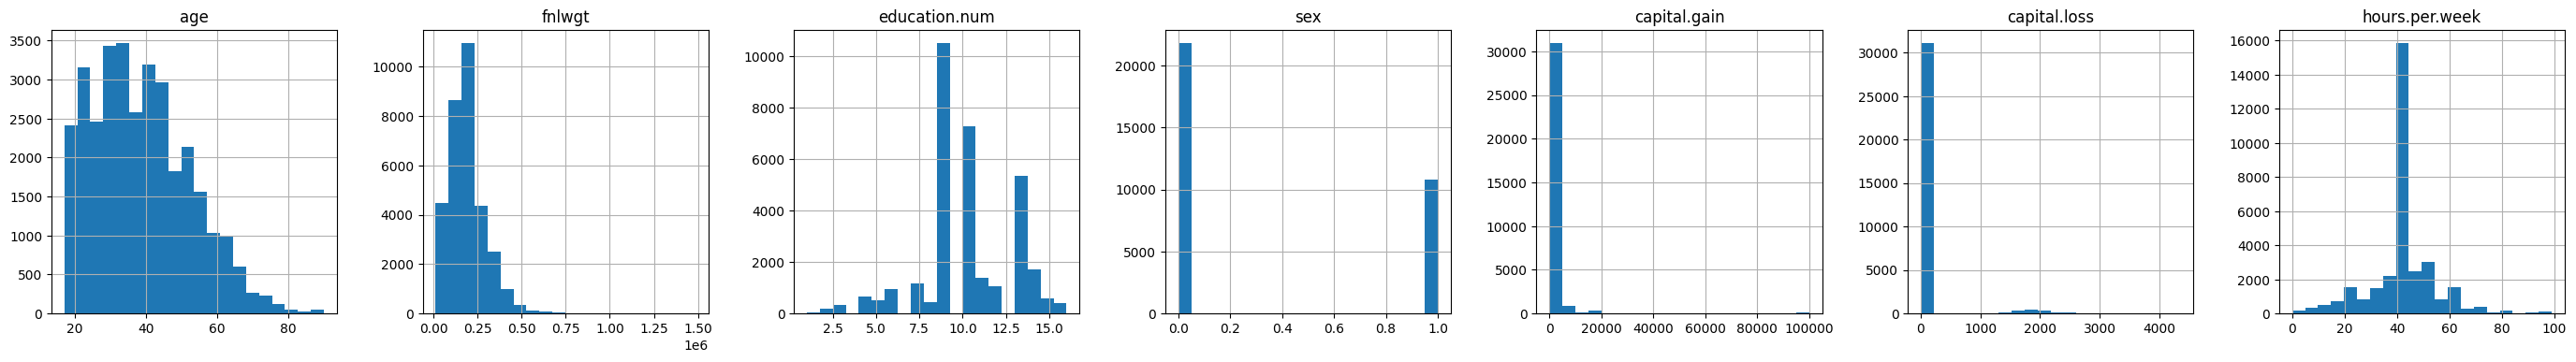

age                0.558743
fnlwgt             1.446980
education.num     -0.311676
sex                0.719293
capital.gain      11.953848
capital.loss       4.594629
hours.per.week     0.222241
dtype: float64

In [15]:
df.hist(bins=20, layout=(10, 10), figsize=(50, 50))
plt.show()

df.skew(numeric_only=True)


In [ ]:
From above plot we are able to see education.num is negatively skewed

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Find the kurtosis of all the variables, and give appropriate interpretation</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [16]:
kurtosis_values=df.kurt(numeric_only=True)
print(type(kurtosis_values))
print(kurtosis_values)

<class 'pandas.core.series.Series'>
age                -0.166127
fnlwgt              6.218811
education.num       0.623444
sex                -1.482709
capital.gain      154.799438
capital.loss       20.376802
hours.per.week      2.916782
dtype: float64


In [17]:
for feature, kurtosis_value in kurtosis_values.items():
    if kurtosis_value > 3:
        interpretation = "heavy-tailed (positive kurtosis)"
    elif kurtosis_value < 3:
        interpretation = "light-tailed (negative kurtosis)"
    else:
        interpretation = "mesokurtic (similar to a normal distribution)"
    
    print(f"\n{feature.capitalize()} has a kurtosis of {kurtosis_value:.2f}, shows {interpretation.capitalize()}.")


Age has a kurtosis of -0.17, shows Light-tailed (negative kurtosis).

Fnlwgt has a kurtosis of 6.22, shows Heavy-tailed (positive kurtosis).

Education.num has a kurtosis of 0.62, shows Light-tailed (negative kurtosis).

Sex has a kurtosis of -1.48, shows Light-tailed (negative kurtosis).

Capital.gain has a kurtosis of 154.80, shows Heavy-tailed (positive kurtosis).

Capital.loss has a kurtosis of 20.38, shows Heavy-tailed (positive kurtosis).

Hours.per.week has a kurtosis of 2.92, shows Light-tailed (negative kurtosis).


In [18]:
kurtosis_interpretation='''Interpretation:

\nIf the kurtosis is greater than 3, it means that the distribution is heavy-tailed, indicating more extreme values than a normal distribution.
\nIf the kurtosis is less than 3, it means that the distribution is light-tailed, indicating fewer extreme values than a normal distribution.
\nIf the kurtosis is approximately 3, it is considered mesokurtic, which means the distribution is similar to a normal distribution in terms of kurtosis.'''

print(kurtosis_interpretation)

Interpretation:


If the kurtosis is greater than 3, it means that the distribution is heavy-tailed, indicating more extreme values than a normal distribution.

If the kurtosis is less than 3, it means that the distribution is light-tailed, indicating fewer extreme values than a normal distribution.

If the kurtosis is approximately 3, it is considered mesokurtic, which means the distribution is similar to a normal distribution in terms of kurtosis.


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Identify the presence of extreme values in age using visualization techniques
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [19]:
age_data = df['age']

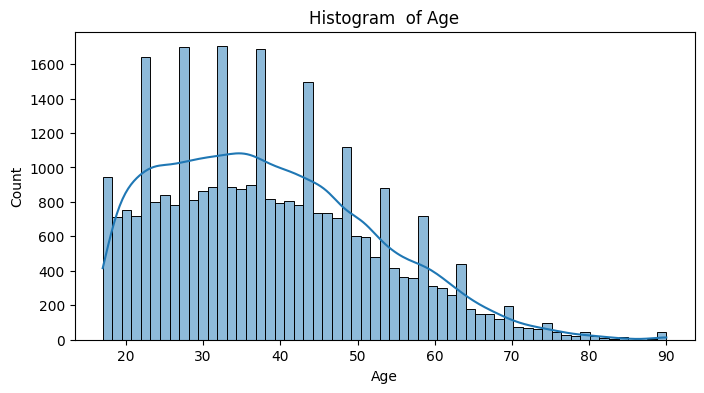

In [20]:

# Create a histogram with density estimation
plt.figure(figsize=(8, 4))
sns.histplot(age_data, kde=True)
plt.title('Histogram  of Age')
plt.xlabel('Age')
plt.show()

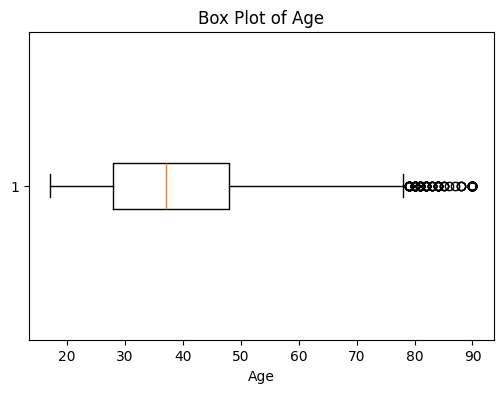

In [21]:

# Create a box plot for 'age'
plt.figure(figsize=(6, 4))
plt.boxplot(age_data, vert=False)
plt.title('Box Plot of Age')
plt.xlabel('Age')
plt.show()

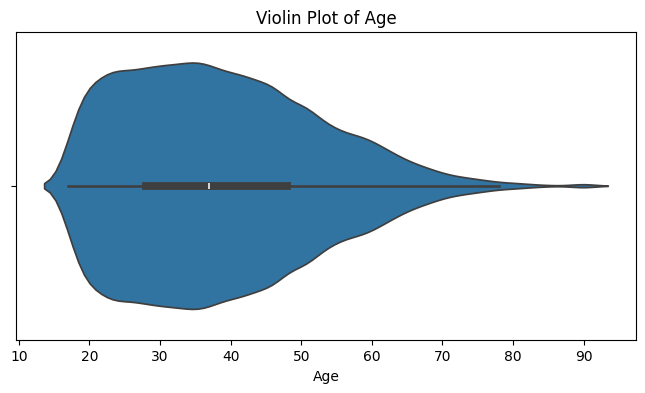

In [22]:
# Create a violin plot
plt.figure(figsize=(8, 4))
sns.violinplot(x=age_data)
plt.title('Violin Plot of Age')
plt.xlabel('Age')
plt.show()

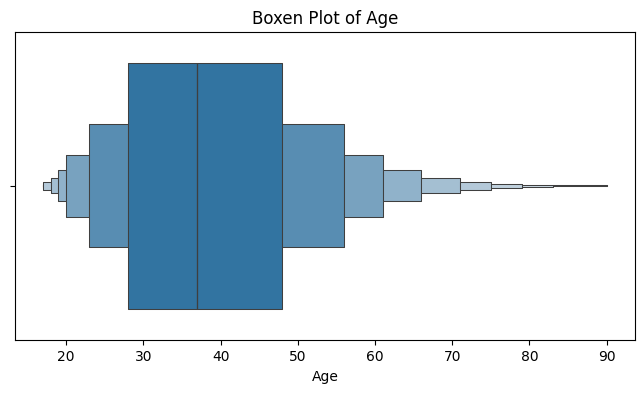

In [23]:
# Create a boxen plot
plt.figure(figsize=(8, 4))
sns.boxenplot(x=age_data)
plt.title('Boxen Plot of Age')
plt.xlabel('Age')
plt.show()


<a id="corr"> </a>
## 5. Correlation

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>11. Is there any effect of age on the working hours of a person?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [24]:
df.corr(numeric_only=True)

,age,fnlwgt,education.num,sex,capital.gain,capital.loss,hours.per.week
age,1.000000,-0.076646,0.036527,-0.088832,0.077674,0.057775,0.069311
fnlwgt,-0.076646,1.000000,-0.043195,-0.026858,0.000432,-0.010252,-0.019033
education.num,0.036527,-0.043195,1.000000,-0.012280,0.122630,0.079923,0.148544
sex,-0.088832,-0.026858,-0.012280,1.000000,-0.048480,-0.045567,-0.229017
capital.gain,0.077674,0.000432,0.122630,-0.048480,1.000000,-0.031615,0.078409
capital.loss,0.057775,-0.010252,0.079923,-0.045567,-0.031615,1.000000,0.054314
hours.per.week,0.069311,-0.019033,0.148544,-0.229017,0.078409,0.054314,1.000000


In [25]:
correlation = df['age'].corr(df['hours.per.week'])

print(f"\n Pearson Correlation between Age and Working Hours: {correlation:.2f}")
significance = "significant" if correlation <0.05 else " Not significant" 
print(f"\n Pearson Correlation is {significance}, correlation: {correlation:.2f}")



 Pearson Correlation between Age and Working Hours: 0.07

 Pearson Correlation is  Not significant, correlation: 0.07


In [26]:
correlation_interpretation='''\nInterpretation:
\nIf the correlation is positive and significant, it suggests that as age increases, working hours tend to increase.
\nIf the correlation is negative and significant, it suggests that as age increases, working hours tend to decrease.
\nIf the correlation is positive but non-significant correlation suggests a weak relationship between age and working hours, and further investigation may be needed to understand the nature of this relationship.'''
print(correlation_interpretation)



Interpretation:

If the correlation is positive and significant, it suggests that as age increases, working hours tend to increase.

If the correlation is negative and significant, it suggests that as age increases, working hours tend to decrease.

If the correlation is positive but non-significant correlation suggests a weak relationship between age and working hours, and further investigation may be needed to understand the nature of this relationship.


<a id="corr"> </a>
## 6. Probability and Distributions

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. The probabilities that “A” and “B” will tell the truth are 2/3 and 4/5 respectively. What is the probability that i) they agree with each other ii) they contradict each other while giving a witness in the court.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13.A city affected by 3 cyclones in a year on an average. Find the probability if the same city will getting affected by exactly 2 cyclones in the upcoming year </b>
                </font>
            </div>
        </td>
    </tr>
</table>

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14.If an athlete attended 6 olympics in his lifetime. Find the probability if he exactly have 2 wins </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [76]:
# Given probabilities
P_A_tells_truth = 2/3
P_B_tells_truth = 4/5

# Probability that they both agree
P_both_agree = (P_A_tells_truth * P_B_tells_truth) + ((1 - P_A_tells_truth) * (1 - P_B_tells_truth))

# Probability that they contradict each other
P_they_contradict = (P_A_tells_truth * (1 - P_B_tells_truth)) + ((1 - P_A_tells_truth) * P_B_tells_truth)

print("i) Probability that they both agree with each other:", P_both_agree)
print("ii) Probability that they contradict each other:", P_they_contradict)


i) Probability that they both agree with each other: 0.6
ii) Probability that they contradict each other: 0.4


In [78]:
import math

# Average number of cyclones per year (λ)
average_cyclones_per_year = 3

# Number of cyclones you want to find the probability for (k)
k = 2

# Calculate the probability using the Poisson distribution formula
probability = (math.exp(-average_cyclones_per_year) * (average_cyclones_per_year ** k)) / math.factorial(k)

print(f"The probability of getting exactly {k} cyclones in the upcoming year is: {probability:.4f}")


The probability of getting exactly 2 cyclones in the upcoming year is: 0.2240


In [77]:
from math import comb

# Define the number of trials (Olympics attended) and probability of winning one Olympics
n = 6
p = 0.2  # Replace with the actual probability of winning

# Define the number of desired wins
k = 2

# Calculate the binomial probability
probability = comb(n, k) * (p ** k) * ((1 - p) ** (n - k))

print("The probability of exactly 2 wins in 6 Olympics is:", probability)


The probability of exactly 2 wins in 6 Olympics is: 0.2457600000000001
